## MVA-MP1 - Sarah Hegazy

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [8]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [9]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [10]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

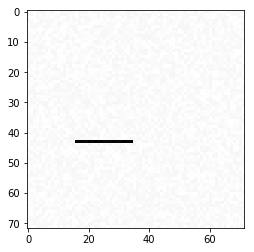

In [11]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

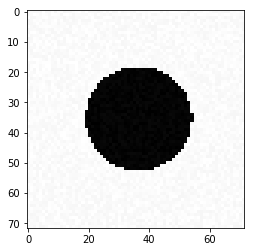

In [12]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

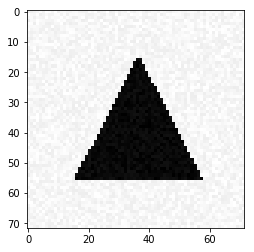

In [13]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [10]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [11]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3)   
    return [X_test, Y_test]

In [12]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [14]:
import matplotlib.patches as patches

In [13]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [15]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

 # 3 -  Simple Classification

In [36]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [1]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

Using TensorFlow backend.


## Stochastic Gradient Descent Optimizer

In [37]:
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))
model.compile(optimizer=optimizers.SGD(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=100, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 1ms/step - loss: 3.3395 - acc: 0.4111 - val_loss: 5.5288 - val_acc: 0.4333
Epoch 2/100
270/270 [==============================] - 0s 117us/step - loss: 4.1613 - acc: 0.3667 - val_loss: 2.6008 - val_acc: 0.4333
Epoch 3/100
270/270 [==============================] - 0s 110us/step - loss: 3.9986 - acc: 0.4111 - val_loss: 5.9870 - val_acc: 0.3667
Epoch 4/100
270/270 [==============================] - 0s 109us/step - loss: 2.6438 - acc: 0.5444 - val_loss: 1.0467 - val_acc: 0.6000
Epoch 5/100
270/270 [==============================] - 0s 141us/step - loss: 1.6616 - acc: 0.6481 - val_loss: 3.9296 - val_acc: 0.4333
Epoch 6/100
270/270 [==============================] - 0s 127us/step - loss: 2.0707 - acc: 0.5593 - val_loss: 0.5253 - val_acc: 0.7667
Epoch 7/100
270/270 [==============================] - 0s 168us/step - loss: 1.0568 - acc: 0.7222 - val_loss: 0.3790 - val_acc: 0.9667
Epoch 8/100


In [39]:
#SIMPLE CLASSSIFICATION
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [40]:
#SIMPLE CLASSSIFICATION
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [41]:
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

## ADAM Optimizer

In [42]:
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, np_utils.to_categorical(Y_train), epochs=100, validation_split=0.1, batch_size = 32)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 2ms/step - loss: 2.2819 - acc: 0.3222 - val_loss: 1.3989 - val_acc: 0.3000
Epoch 2/100
270/270 [==============================] - 0s 200us/step - loss: 1.0772 - acc: 0.5074 - val_loss: 0.9154 - val_acc: 0.3667
Epoch 3/100
270/270 [==============================] - 0s 175us/step - loss: 0.7128 - acc: 0.6444 - val_loss: 0.5317 - val_acc: 0.7333
Epoch 4/100
270/270 [==============================] - 0s 198us/step - loss: 0.5389 - acc: 0.7593 - val_loss: 0.4996 - val_acc: 0.8000
Epoch 5/100
270/270 [==============================] - 0s 177us/step - loss: 0.4005 - acc: 0.8296 - val_loss: 0.4030 - val_acc: 0.8000
Epoch 6/100
270/270 [==============================] - 0s 204us/step - loss: 0.3560 - acc: 0.8852 - val_loss: 0.3425 - val_acc: 0.8667
Epoch 7/100
270/270 [==============================] - 0s 206us/step - loss: 0.3084 - acc: 0.8926 - val_loss: 0.3248 - val_acc: 0.8000
Epoch 8/100


In [44]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [46]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [47]:
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

#### Results
both SGD and ADAM perform very well for this classification problem with the both of them converging towards an accuracy of 1 (ADAM reaches 1.0 much faster than SGD and requires less epochs

# 4 - Visualization of the Solution

In [48]:
w = model.get_weights()[0]

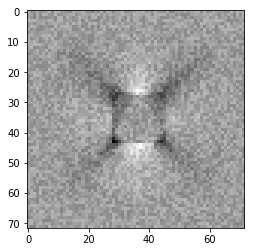

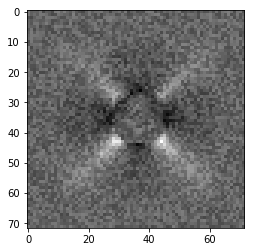

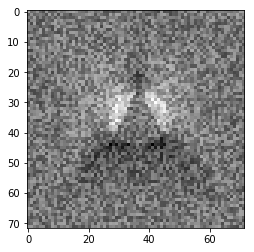

In [49]:
#Visualization 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
%matplotlib inline
plt.imshow(w[:,0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(w[:,1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(w[:,2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

#### Results
By plotting the 3 columns representing the 3 classes, we notice that the model recognizes the rectangles by finding the corners (darker shades around the corners) then the circle by not finding those corners but finding points where the circle touches the box (at the diameter) and finally triangles by not finding the corners at the top and finding them at the bottom. 

# 5 - A More Difficult Classification Problem

In [50]:
#generate training set
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [51]:
#Generate test set
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [52]:
#use ADAM from exercise 4
# We retrain the same model as before
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, np_utils.to_categorical(Y_train), epochs=100, batch_size = 32)

Epoch 1/100
1000/1000 [==============================] - 1s 598us/step - loss: 1.6433 - acc: 0.3800
Epoch 2/100
1000/1000 [==============================] - 0s 173us/step - loss: 1.1736 - acc: 0.4590
Epoch 3/100
1000/1000 [==============================] - 0s 159us/step - loss: 0.9654 - acc: 0.5490
Epoch 4/100
1000/1000 [==============================] - 0s 156us/step - loss: 0.8563 - acc: 0.5730
Epoch 5/100
1000/1000 [==============================] - 0s 156us/step - loss: 0.8450 - acc: 0.6100
Epoch 6/100
1000/1000 [==============================] - 0s 154us/step - loss: 0.7847 - acc: 0.6330
Epoch 7/100
1000/1000 [==============================] - 0s 171us/step - loss: 0.8102 - acc: 0.6010
Epoch 8/100
1000/1000 [==============================] - 0s 127us/step - loss: 0.8626 - acc: 0.5700
Epoch 9/100
1000/1000 [==============================] - 0s 122us/step - loss: 0.7720 - acc: 0.6180
Epoch 10/100
1000/1000 [==============================] - 0s 134us/step - loss: 0.7507 - acc: 0.6200

In [53]:
"Loss : {}, Accuracy : {}".format(*model.evaluate(X_test, Y_test))

300/300 [==============================] - 0s 317us/step


'Loss : 0.9102627698580424, Accuracy : 0.6066666666666667'

#### Results
The Accuracy is a lot lower and doesn't converge to 1 like before.

In [54]:
#Convolutional (not to) deep network
from keras.layers import Conv2D, MaxPooling2D, Flatten

X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, np_utils.to_categorical(Y_train), epochs=50, batch_size=32)

Epoch 1/50
1000/1000 [==============================] - 5s 5ms/step - loss: 1.7211 - acc: 0.4690
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6643 - acc: 0.7530
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5140 - acc: 0.8150
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4266 - acc: 0.8480
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3609 - acc: 0.8900
Epoch 6/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2984 - acc: 0.9270
Epoch 7/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2364 - acc: 0.9540
Epoch 8/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2098 - acc: 0.9570
Epoch 9/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1870 - acc: 0.9770
Epoch 10/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1440 - acc: 0.9900
Epoch 11/50
1000/1000 [======

In [55]:
"Loss : {}, Accuracy : {}".format(*model.evaluate(X_test, Y_test))

300/300 [==============================] - 1s 2ms/step


'Loss : 0.5171080032984415, Accuracy : 0.8399999992052714'

In [56]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, np_utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0971 - acc: 0.4880
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7875 - acc: 0.6600
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6562 - acc: 0.7560
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5678 - acc: 0.7870
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5093 - acc: 0.8240
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4421 - acc: 0.8650
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4083 - acc: 0.8820
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3722 - acc: 0.8940
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3308 - acc: 0.9210
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3152 - acc: 0.9140


In [58]:
"Loss : {}, Accuracy : {}".format(*model.evaluate(X_test, Y_test))

300/300 [==============================] - 0s 1ms/step


'Loss : 0.4732579700152079, Accuracy : 0.8399999992052714'

### Results
Tested pool size of (1,1) and (2,2). Also increased the training sample. Loss function is 0.4 and a much higher accuracy with 84%

# 6 A Regression Problem 

In [111]:
#generate training set
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


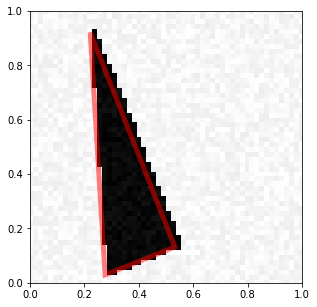

In [19]:
visualize_prediction(X_train[1], Y_train[1])

In [20]:
print( Y_train[1])

[0.22121675 0.92110014 0.5327893  0.13201365 0.27603785 0.02898695]


In [112]:
#generate the test set
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [88]:
Y_test[0]

array([0.94133439, 0.93818117, 0.67661723, 0.27556678, 0.36340393,
       0.33217252])

In [113]:
def normalize(Y_t):
    m=np.zeros((Y_t.shape[0],Y_t.shape[1]))
    for i in range(Y_t.shape[0]):
        x=np.array([Y_t[i,0],Y_t[i,2],Y_t[i,4]])
        index_sort=np.argsort(x)
        m[i,0]=Y_t[i,index_sort[0]*2]
        m[i,1]=Y_t[i,index_sort[0]*2+1] 
        m[i,2]=Y_t[i,index_sort[1]*2]
        m[i,3]=Y_t[i,index_sort[1]*2+1]
        m[i,4]=Y_t[i,index_sort[2]*2]
        m[i,5]=Y_t[i,index_sort[2]*2+1] 
    return m

In [103]:
Y_train =normalize(Y_train)
Y_test=normalize(Y_test)

In [104]:
Y_test.shape

(300, 6)

In [106]:
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

In [92]:
print(Y_train)

[[0.41011177 0.7351788  0.52364466 0.2843936  0.53043176 0.68713362]
 [0.43336629 0.81730236 0.79832721 0.89024453 0.86766835 0.23220491]
 [0.31339947 0.48198236 0.84190462 0.11055595 0.94025231 0.32218835]
 ...
 [0.04909837 0.15440028 0.1695892  0.29460742 0.28317018 0.80886473]
 [0.2744418  0.41669149 0.46470893 0.01581777 0.72986548 0.33635093]
 [0.09024661 0.1290996  0.16119482 0.45532352 0.68763385 0.43909288]]


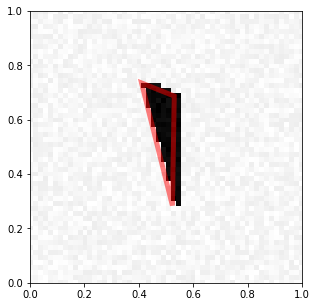

In [93]:
visualize_prediction(X_train[0], Y_train[0])

In [127]:
from keras.layers import BatchNormalization,Reshape, Dropout
model = Sequential()
model.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
model.add(Reshape((IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu')) 

model.add(Dense(6, activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model.fit((X_train),normalize(Y_train) ,validation_split=0.2, epochs=30, batch_size=32)

Train on 240 samples, validate on 60 samples
Epoch 1/30
240/240 [==============================] - 4s 19ms/step - loss: 0.1261 - acc: 0.3500 - val_loss: 0.0637 - val_acc: 0.5000
Epoch 2/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0573 - acc: 0.4750 - val_loss: 0.0536 - val_acc: 0.5500
Epoch 3/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0449 - acc: 0.5125 - val_loss: 0.0465 - val_acc: 0.5667
Epoch 4/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0396 - acc: 0.5417 - val_loss: 0.0392 - val_acc: 0.6167
Epoch 5/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0350 - acc: 0.5333 - val_loss: 0.0417 - val_acc: 0.6000
Epoch 6/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0341 - acc: 0.5458 - val_loss: 0.0369 - val_acc: 0.5833
Epoch 7/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0299 - acc: 0.5833 - val_loss: 0.0332 - val_acc: 0.6500
Epoch 8/30
240/240 [==========

In [130]:
model.evaluate(X_test, normalize(Y_test))

300/300 [==============================] - 1s 3ms/step


[0.02151001403729121, 0.7966666674613953]

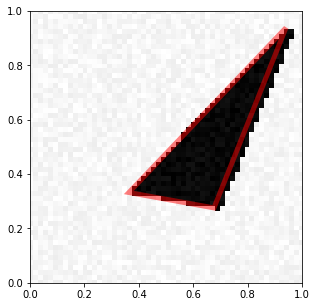

In [131]:
visualize_prediction(X_test[0],Y_test[0])

# 7 Image Denoising

In [5]:
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

def generate_a_rectangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)

def generate_a_disk_noise(free_location=False):
    noise = np.random.randint(0,100)  #generate noise value randomly
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)
  
def generate_a_triangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_noise(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_noise(nb_samples, free_location=False):
    # Getting im_size:
    noise = np.random.randint(0,100)  #generate noise value randomly
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_noise(free_location)
        else:
            [X[i], V] = generate_a_triangle_noise(free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

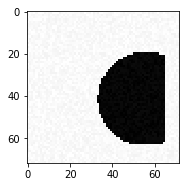

In [20]:
#plot a disk with noise 
im = generate_a_disk_noise(True)
plt.subplot(1,2,2)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [15]:
#create training dataset
trainset, cat = generate_dataset_noise(1000)

#reshape
X_train = trainset[:,0]
Y_train = trainset[:,1]

X_train = X_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = Y_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [16]:
#model
from keras.models import Input, Model
from keras.layers import UpSampling2D, Conv2D, MaxPooling2D

inp = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))


x = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Using TensorFlow backend.


In [17]:
model_denoiser = Model(inp, output)
model_denoiser.compile(optimizer="adam", loss='binary_crossentropy')
model_denoiser.fit(X_train, Y_train, epochs=10, batch_size=128,validation_split=0.2, shuffle=True, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 24s 30ms/step - loss: 0.6659 - val_loss: 0.6078
Epoch 2/10
800/800 [==============================] - 23s 29ms/step - loss: 0.6050 - val_loss: 0.5997
Epoch 3/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5960 - val_loss: 0.5914
Epoch 4/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5829 - val_loss: 0.5763
Epoch 5/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5622 - val_loss: 0.5516
Epoch 6/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5416 - val_loss: 0.5318
Epoch 7/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5225 - val_loss: 0.5129
Epoch 8/10
800/800 [==============================] - 24s 29ms/step - loss: 0.5090 - val_loss: 0.5052
Epoch 9/10
800/800 [==============================] - 23s 29ms/step - loss: 0.5042 - val_loss: 0.5036
Epoch 10/10
800/800 [===============

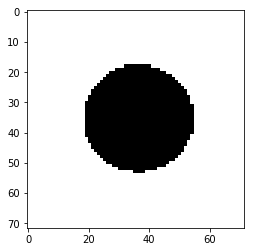

In [26]:
plt.imshow((model_denoiser.predict(X_train[0].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)))
plt.imshow((Y_train[30].reshape((IMAGE_SIZE,IMAGE_SIZE))), cmap='gray')

In [27]:
#create test dataset
testset, _ = generate_dataset_noise(10, 20)

#reshape
X_test = testset[:,0]
Y_test = testset[:,1]
X_test = X_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = Y_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)

Creating data:
0


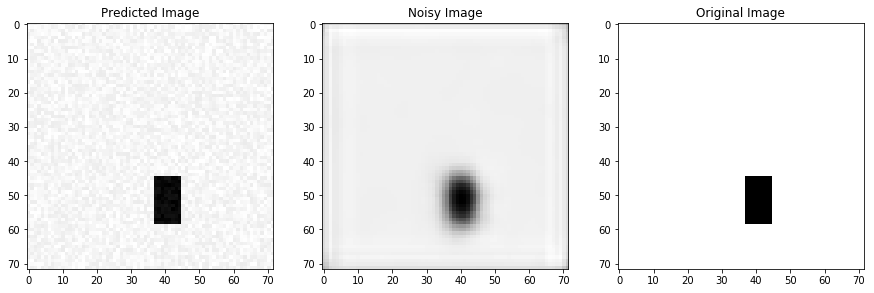

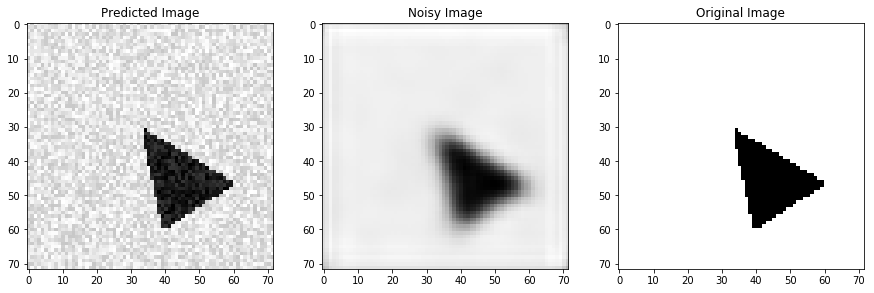

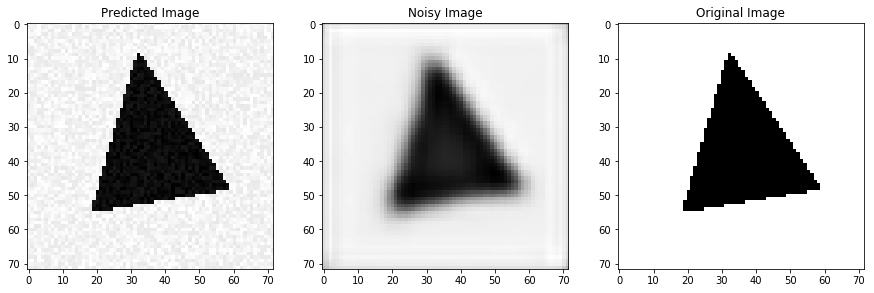

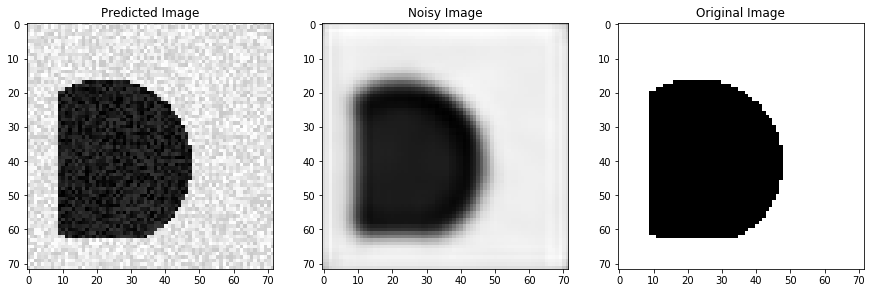

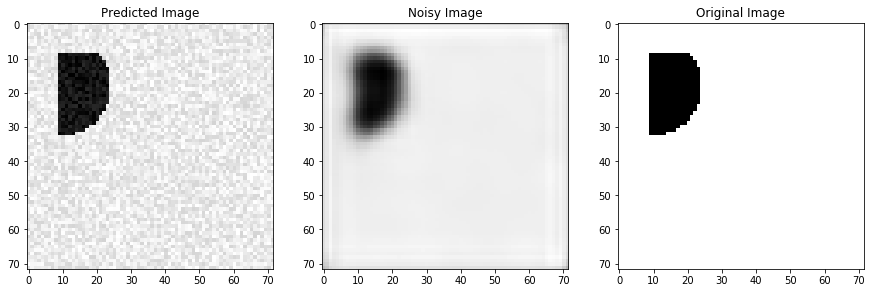

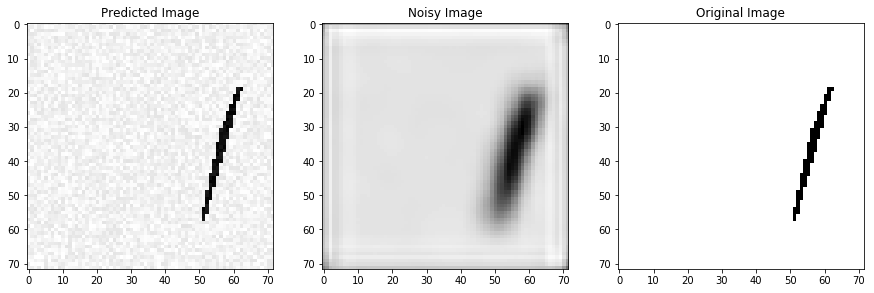

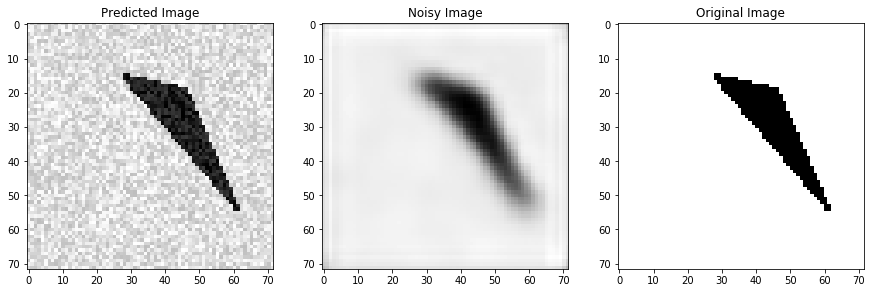

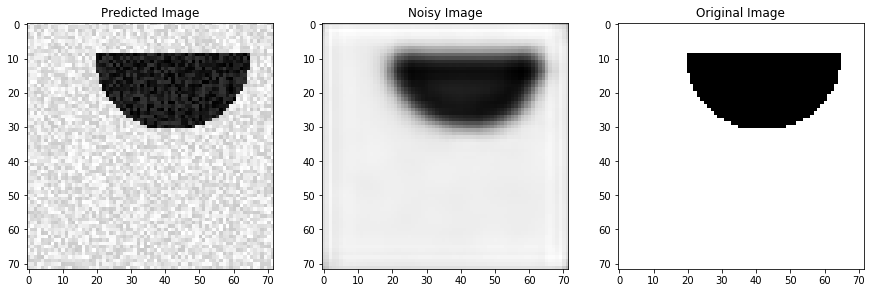

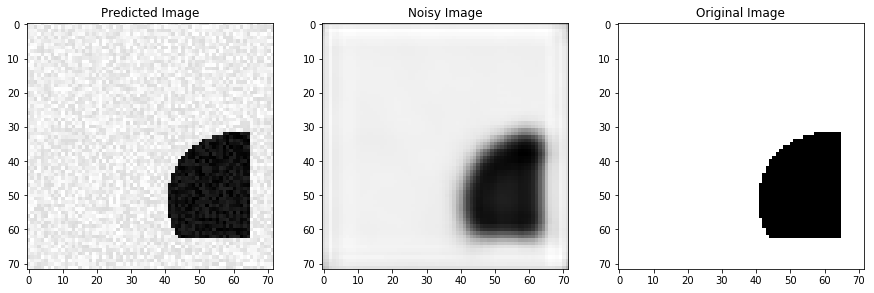

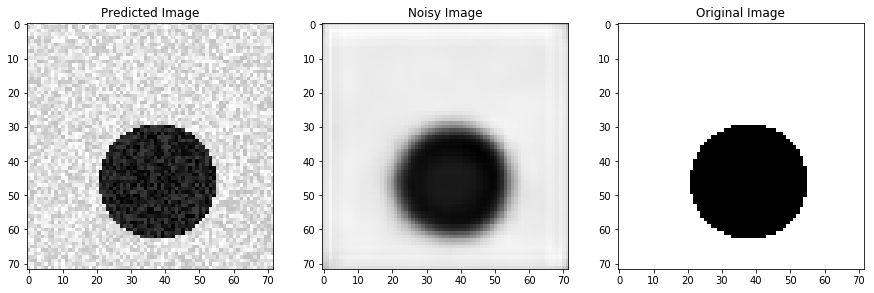

In [30]:
for j in range(10):
  fig = plt.figure(figsize = (15,30))
  fig.tight_layout()
  
  ax = plt.subplot(1, 3, 3)
  plt.imshow(Y_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Original Image")

  ax = plt.subplot(1, 3, 2)
  plt.imshow((model_denoiser.predict(X_test[j].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Noisy Image")

  ax = plt.subplot(1, 3, 1)
  plt.imshow(X_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Predicted Image")
 

# ###Results
We can see that the predicted image is pretty close to the original one. However, the backgrounds are no longer white and clear as before due to the noise added then the contrast to denoise the image. The algorithm might perform less well on thinner shapes as the edges are not well defined unlike wider shapes. 